# Distracted Drivers competition

In [13]:
import numpy as np

## Preparation

In [2]:
import os, sys
import glob

LESSON_HOME_DIR = '/home/ubuntu/courses/deeplearning1/my-nbs/'
DATA_PATH = '/home/ubuntu/data/statefarm-drivers/'
TRAIN_PATH = DATA_PATH + 'train/'
VAL_PATH = DATA_PATH + 'valid/'

In [3]:
%pwd

u'/home/ubuntu/courses/deeplearning1/my-nbs'

In [5]:
%cd $VAL_PATH

/home/ubuntu/data/statefarm-drivers/valid


In [6]:
%mkdir c0 c1 c2 c3 c4 c5 c6 c7 c8 c9

In [7]:
%cd /home/ubuntu/data/statefarm-drivers/train

/home/ubuntu/data/statefarm-drivers/train


In [8]:
%cd $DATA_PATH

/home/ubuntu/data/statefarm-drivers


In [9]:
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results

In [11]:
%cd $TRAIN_PATH

/home/ubuntu/data/statefarm-drivers/train


In [12]:
from os import listdir
from os.path import isfile, join
dirs = [f for f in listdir(TRAIN_PATH) if not isfile(join(TRAIN_PATH, f))]
print (dirs)

['c7', 'c8', 'c6', 'c0', 'c2', 'c4', 'c9', 'c1', 'c3', 'c5']


In [15]:
for d in dirs:
    p = os.path.join(TRAIN_PATH, d)+'/*.jpg'
    g = glob.glob(p)
    shuf = np.random.permutation(g)
    for i in range(200): 
        fname = shuf[i].split('/')[-1]
        p2 = os.path.join(DATA_PATH, 'valid', d, fname)
#         print(p2)c
        os.rename(shuf[i], p2)
    

## Create sample 

In [18]:
%cd $DATA_PATH/sample

/home/ubuntu/data/statefarm-drivers/sample


In [19]:
%mkdir c0 c1 c2 c3 c4 c5 c6 c7 c8 c9

In [16]:
from shutil import copyfile

In [21]:
for d in dirs:
    p = os.path.join(TRAIN_PATH, d)+'/*.jpg'
    g = glob.glob(p)
    shuf = np.random.permutation(g)
    for i in range(200): 
        fname = shuf[i].split('/')[-1]
        p2 = os.path.join(DATA_PATH, 'sample', 'train', d, fname)
#         print(p2)
        copyfile(shuf[i], p2)

 
 
# Let's do some Deep Learning
 
  

In [1]:
%matplotlib inline
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
DATA_PATH = '/home/ubuntu/data/statefarm-drivers/sample/'
# DATA_PATH = '/home/ubuntu/data/statefarm-drivers/'

BATCH_SIZE = 64

In [3]:
import utils; reload(utils)
from vgg16 import Vgg16

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [4]:
vgg = Vgg16()

In [5]:
batches = vgg.get_batches(DATA_PATH+'train', batch_size=4)

Found 2000 images belonging to 10 classes.


In [6]:
imgs, labels = next(batches)

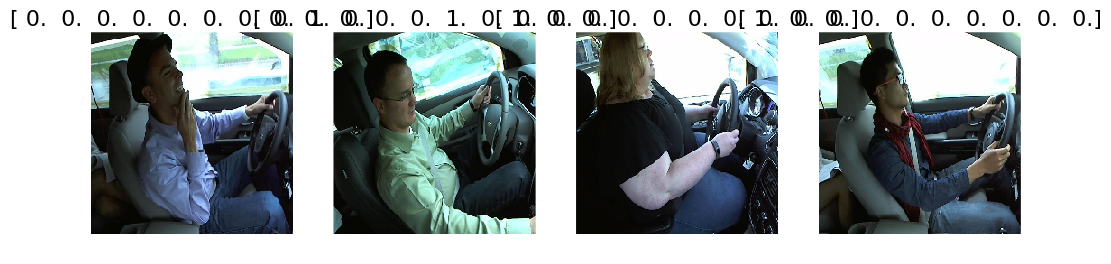

In [7]:
utils.plots(imgs, titles=labels)

In [12]:
vgg.predict(imgs)

(array([ 0.616 ,  0.7994,  0.3157,  0.3498], dtype=float32),
 array([785, 785, 785, 785]),
 [u'seat_belt', u'seat_belt', u'seat_belt', u'seat_belt'])

## Finetune

In [10]:
batches = vgg.get_batches(DATA_PATH+'train/', batch_size=64)
val_batches = vgg.get_batches(DATA_PATH+'../valid', batch_size=64)

Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


(array([ 0.616 ,  0.7994,  0.3157,  0.3498], dtype=float32),
 array([785, 785, 785, 785]),
 [u'seat_belt', u'seat_belt', u'seat_belt', u'seat_belt'])

In [13]:
vgg.finetune(batches=batches)

In [17]:
vgg.fit(batches, val_batches, nb_epoch=3)

Epoch 1/3
2000/2000 [==============================] - 96s - loss: 1.8237 - acc: 0.4610 - val_loss: 0.8695 - val_acc: 0.7300
Epoch 2/3
2000/2000 [==============================] - 95s - loss: 1.5979 - acc: 0.5235 - val_loss: 0.7352 - val_acc: 0.7710
Epoch 3/3
2000/2000 [==============================] - 95s - loss: 1.3608 - acc: 0.5795 - val_loss: 0.7400 - val_acc: 0.7660
